#Install the ucimlrepo package

In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [ ]:
# Load Dataset

df = pd.read_csv(r"C:\Users\albea\Desktop\heart+disease\processed.cleveland.data")

# Display first 5 rows
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


### Check Missing Values

In [ ]:
# Check all values
print(df.isna())

      63.0    1.0  1.0.1  145.0  233.0  1.0.2    2.0  150.0    0.0    2.3  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
297  False  False  False  False  False  False  False  False  False  False   
298  False  False  False  False  False  False  False  False  False  False   
299  False  False  False  False  False  False  False  False  False  False   
300  False  False  False  False  False  False  False  False  False  False   
301  False  False  False  False  False  False  False  False  False  False   

       3.0  0.0.1    6.0      0  
0    False  False  False  False  
1    Fa

In [ ]:
print(df.isna().sum())

63.0     0
1.0      0
1.0.1    0
145.0    0
233.0    0
1.0.2    0
2.0      0
150.0    0
0.0      0
2.3      0
3.0      0
0.0.1    0
6.0      0
0        0
dtype: int64


### Check duplicate rows

In [ ]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

### No. of rows and columns

In [ ]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (302, 14) 

number of rows:  302
number of columns:  14


### Data type of columns

In [ ]:
# viewing the data types of columns
df.dtypes

63.0     float64
1.0      float64
1.0.1    float64
145.0    float64
233.0    float64
1.0.2    float64
2.0      float64
150.0    float64
0.0      float64
2.3      float64
3.0      float64
0.0.1        str
6.0          str
0          int64
dtype: object

In [ ]:
# Assign column names
df.columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "target"
]

# Convert columns to numeric format
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

# Display data types
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

### Descriptive summary Statistics

In [ ]:
# Statistical summary
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,298.000000,300.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.674497,4.730000,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.938202,1.941563,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### Univariate Analysis

In [ ]:
print(df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='str')


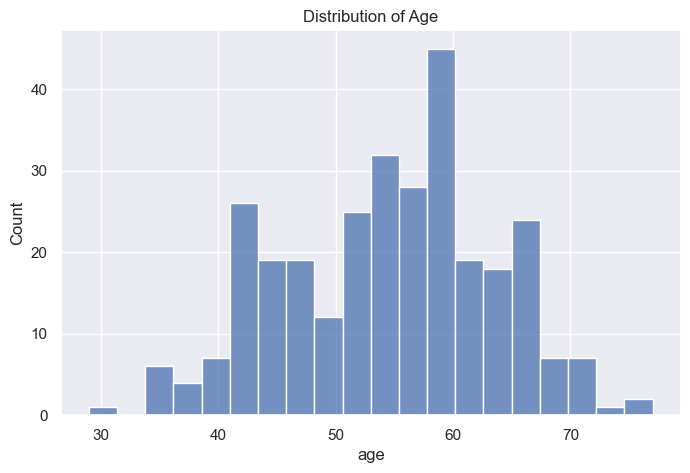

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20)
plt.title("Distribution of Age")
plt.show()

### Distribution of Revenue

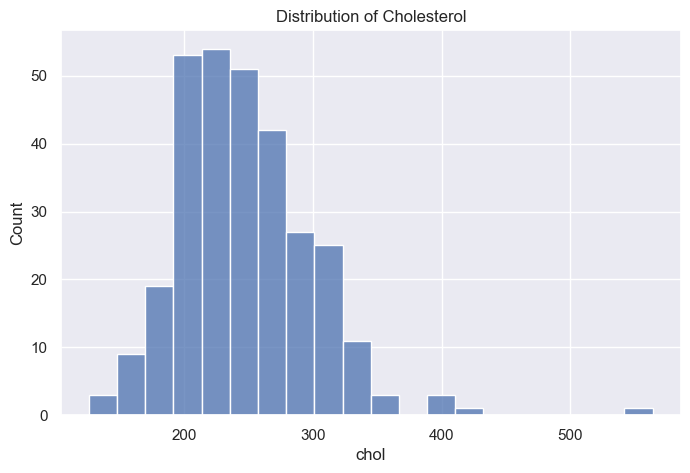

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['chol'], bins=20)
plt.title("Distribution of Cholesterol")
plt.show()

## Bivariate Analysis

### Age by Target

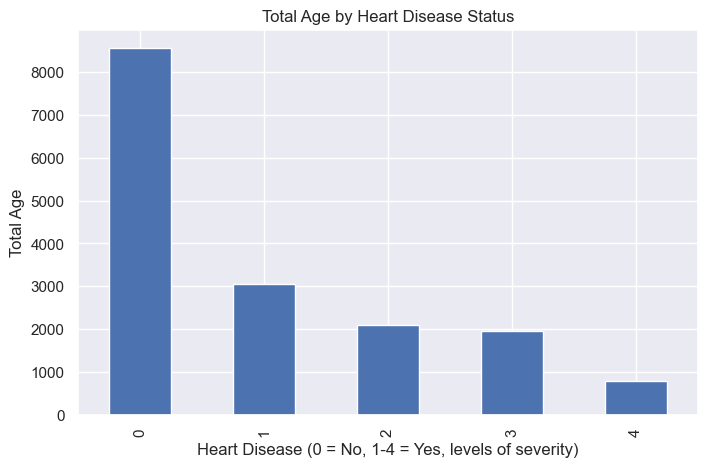

target
0    8561.0
1    3046.0
2    2089.0
3    1960.0
4     776.0
Name: age, dtype: float64

In [ ]:
# Group by target and sum age
target_age = df.groupby('target')['age'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
target_age.plot(kind='bar')
plt.title("Total Age by Heart Disease Status")
plt.ylabel("Total Age")
plt.xlabel("Heart Disease (0 = No, 1-4 = Yes, levels of severity)")
plt.show()

target_age 


### Cholesterol by Target

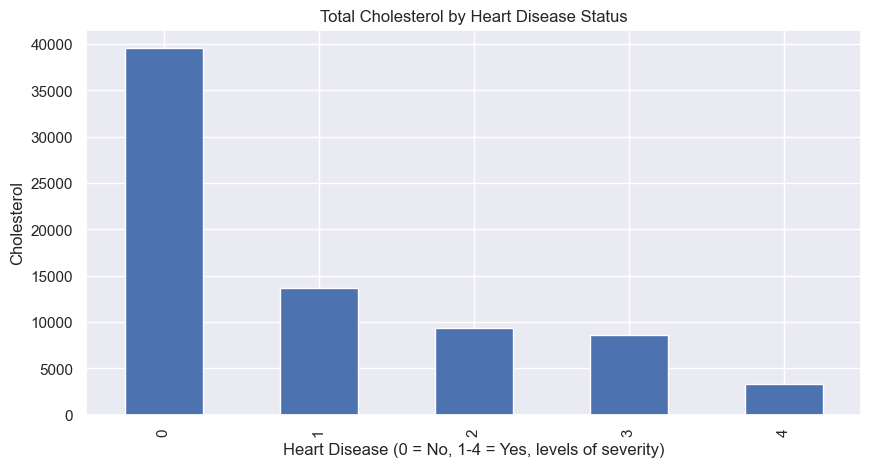

target
0    39560.0
1    13701.0
2     9334.0
3     8626.0
4     3294.0
Name: chol, dtype: float64

In [ ]:
# Group by target and sum cholesterol
target_chol = df.groupby('target')['chol'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
target_chol.plot(kind='bar')
plt.title("Total Cholesterol by Heart Disease Status")
plt.ylabel("Cholesterol")
plt.xlabel("Heart Disease (0 = No, 1-4 = Yes, levels of severity)")
plt.show()

target_chol 

### Max Heart Rate by Target

In [ ]:
# Group by target and sum Max Heart Rate
target_thalach = df.groupby('target')['thalach'].sum().sort_values(ascending=False)

# Display top 10
target_thalach.head(10)

# will show only 5 rows, because target only has 5 unique levels


target
0    25824.0
1     8026.0
2     4881.0
3     4622.0
4     1828.0
Name: thalach, dtype: float64

### Age vs Cholesterol

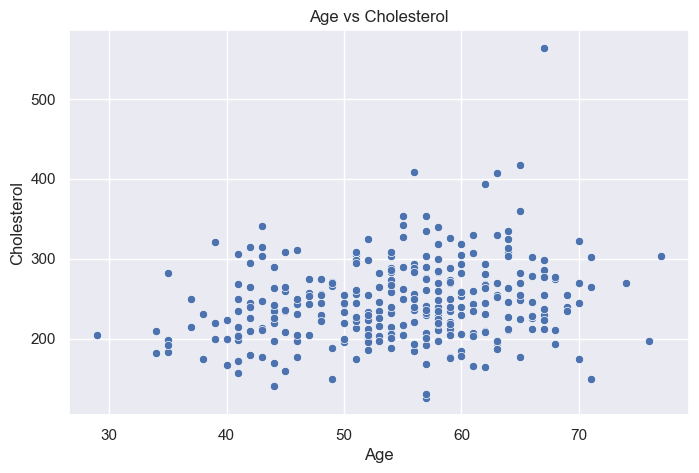

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='chol', data=df)
plt.title("Age vs Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()


### Correlation Matrix

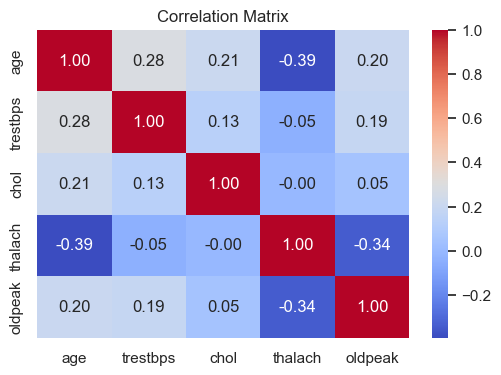

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


- Closer to 1 or -1 → stronger linear relationship.

- Closer to 0 → weaker or no linear relationship.